In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from landscapes.landscapes import Landscape
from landscapes.modules import Node, UnstableNode, Center, NegCenter
from landscapes.landscape_visuals import *
from landscapes.morphogen_regimes import mr_const, mr_sigmoid, mr_piecewise

# %load_ext autoreload

Node at (-1.5, 0.0), a = 1.5, s = 1.0
Node at (1.5, 0.0), a = 2.0, s = 0.8
UnstableNode at (0.0, 1.0), a = 1.3, s = 0.8
Landscape with modules:
Node at (-1.5, 0.0), a = 1.5, s = 1.0,
Node at (1.5, 0.0), a = 2.0, s = 0.8,
UnstableNode at (0.0, 1.0), a = 1.3, s = 0.8


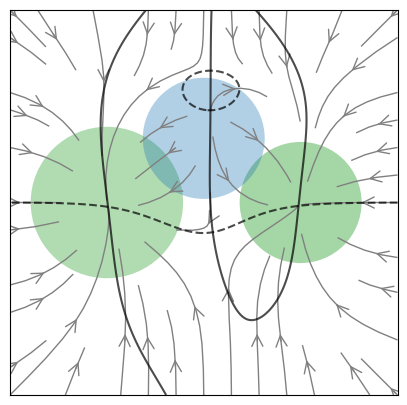

In [2]:
# Landscape with one regime + simple visualization

M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')


Node at (-1.5, 0.0), a = [1.5 2. ], s = [1.  0.6]
Node at (1.5, 0.0), a = [2. 2.], s = [0.5 1.2]
UnstableNode at (0.0, 1.0), a = [1.3 1.4], s = [0.8 0.5]
Landscape with modules:
Node at (-1.5, 0.0), a = [1.5 2. ], s = [1.  0.6],
Node at (1.5, 0.0), a = [2. 2.], s = [0.5 1.2],
UnstableNode at (0.0, 1.0), a = [1.3 1.4], s = [0.8 0.5]


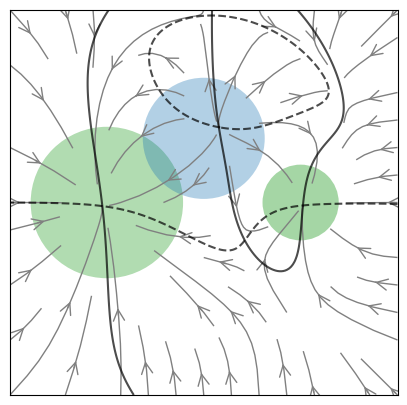

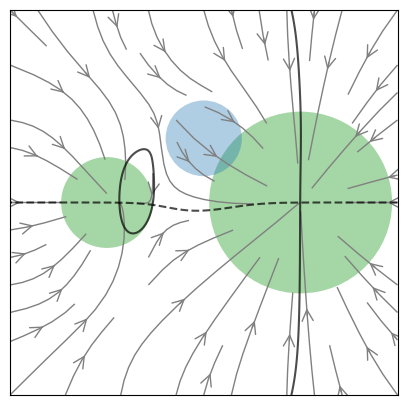

In [3]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2., 2.), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')


Landscape with modules:
Node at (0.0, 0.0), a = [1.5 1.5], s = [2. 2.], tau = 1.0,
UnstableNode at (0.0, 0.0), a = [2. 0.], s = [1.3 1. ], tau = 1.0,
Center at (0.0, 0.0), a = [1. 1.], s = [2.2 2.2], tau = 1.0


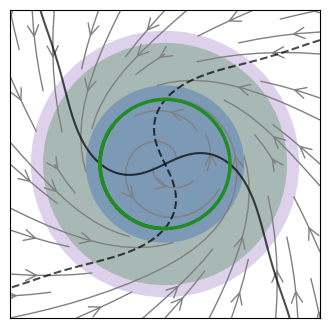

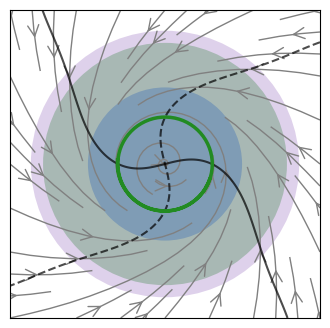

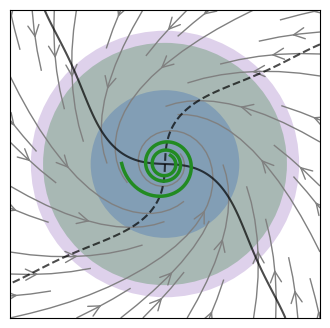

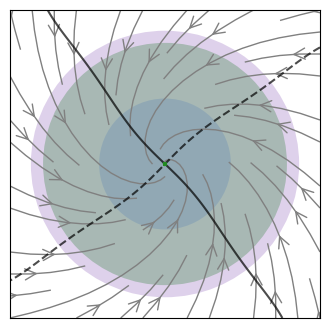

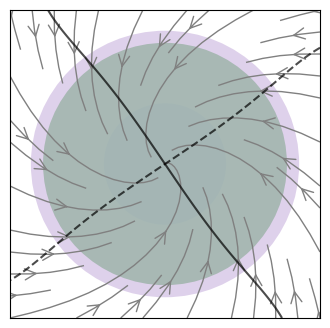

In [4]:
# Landscape with two regimes (sigmoid) + visulization of timepoints with trajectory 
# (Hopf bifurcation)

M1 = Node(0., 0., (1.5, 1.5), (2., 2.), tau=1.)
M2 = UnstableNode(0., 0., (2., 0), (1.3, 1.0), tau=1.)
M3 = Center(0., 0., (1., 1.), (2.2, 2.2), tau=1.)

module_list = [M1, M2, M3]

l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=2, morphogen_times=(0.,))
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape_t(l, xx, yy, -5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -2., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=30)
fig = visualize_landscape_t(l, xx, yy, 1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, 5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)



Landscape with modules:
Node at (0.87074, 2.04246), a = [2.31664 1.17421 0.56911], s = [0.72908 1.0464  1.40162],
Node at (-2.79124, -2.6566), a = [1.41463 2.16624 0.84814], s = [0.70158 1.3343  1.19869],
Node at (-1.10358, 2.84388), a = [1.35663 1.18348 2.46172], s = [1.34314 0.51549 1.25629],
Node at (-0.7772, -0.74476), a = [1.10372 1.55342 2.21475], s = [1.19181 1.03653 0.50977],
Node at (1.89535, 0.95123), a = [2.37061 1.46826 2.11266], s = [1.14202 1.1804  0.85644]


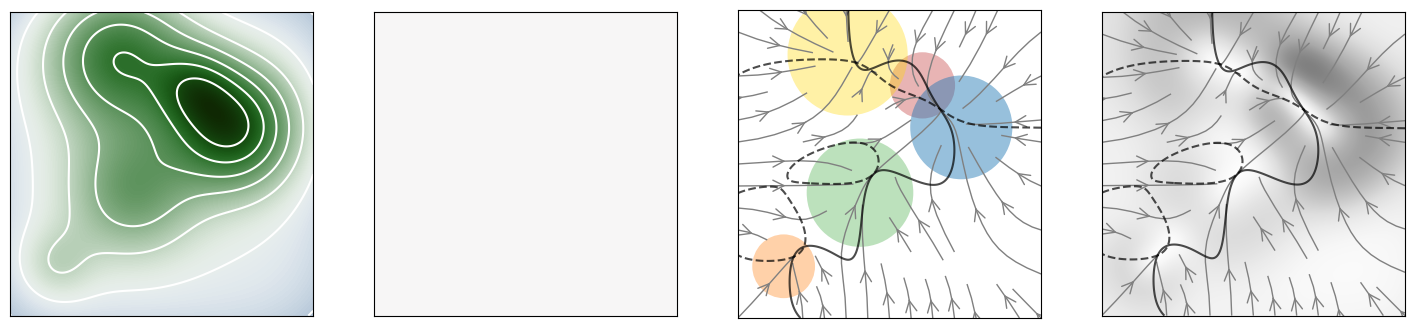

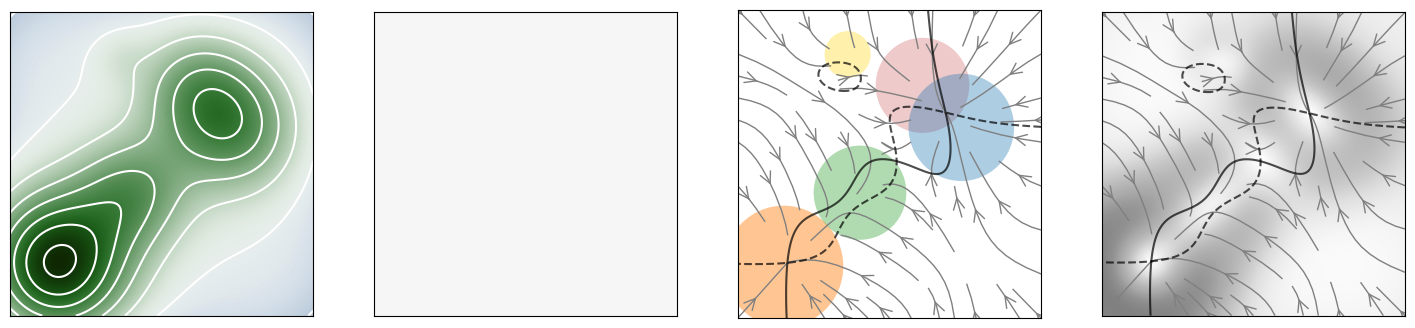

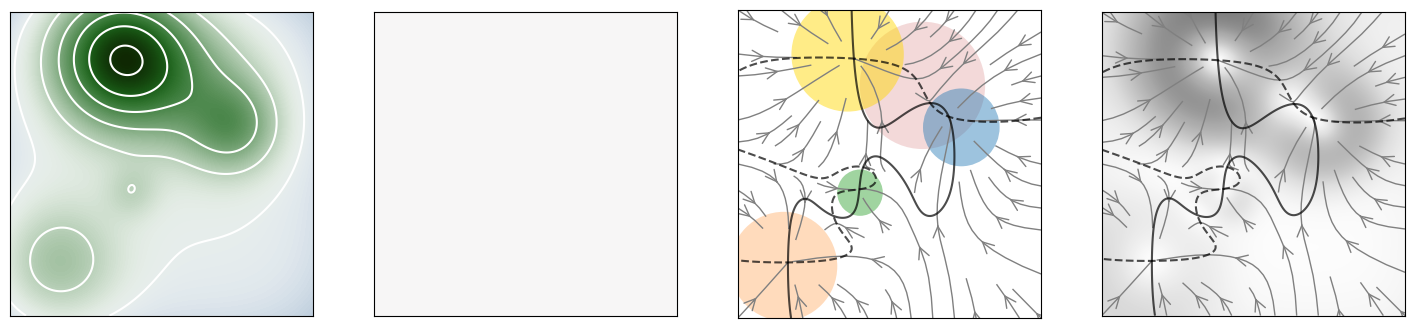

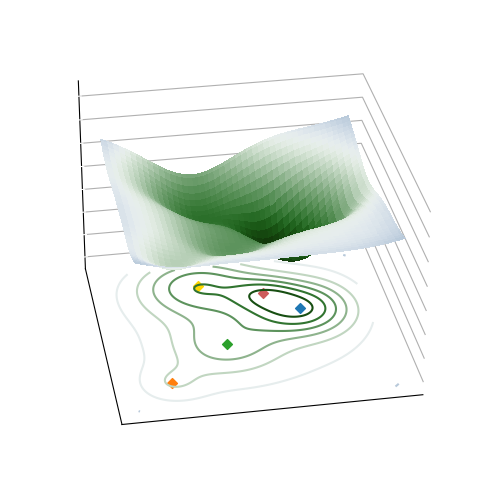

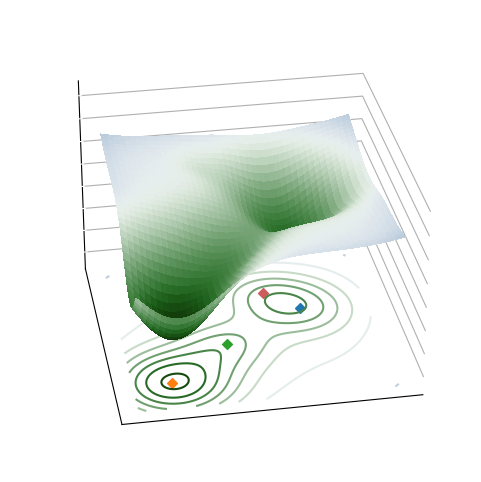

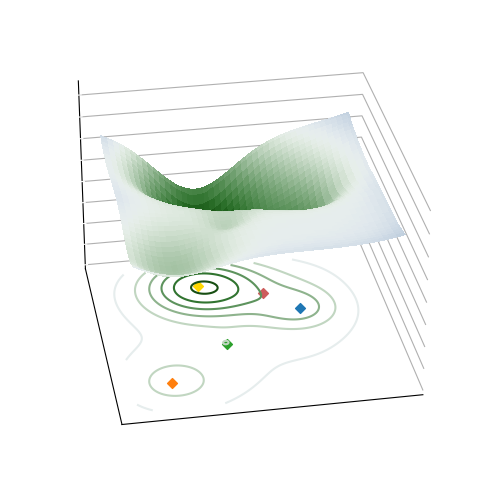

In [5]:
# Random generation of a landscape with node modules (piecewise 3 regimes)
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node,)
n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

dX, dY = visualize_all(landscape, xx,yy,times, color_scheme='order', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 1, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='order', cmap_center=0., scatter=True)

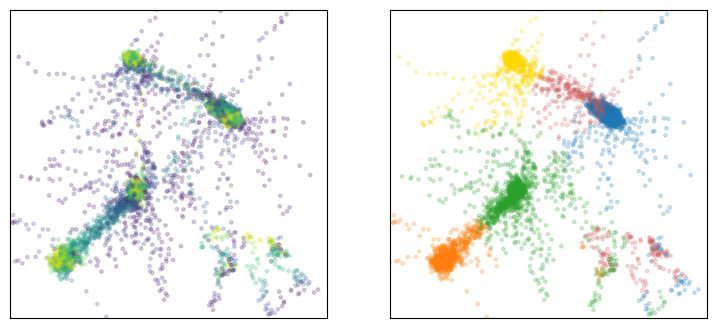

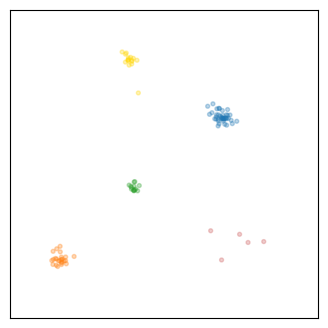

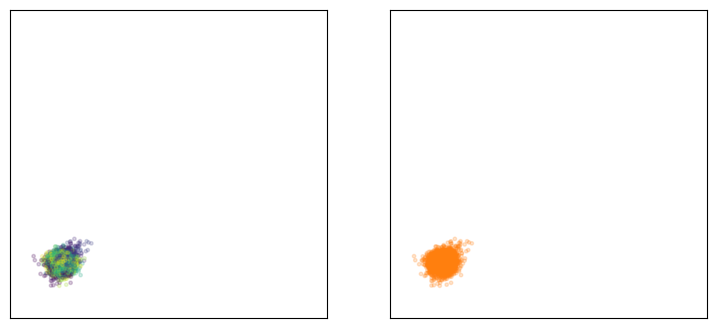

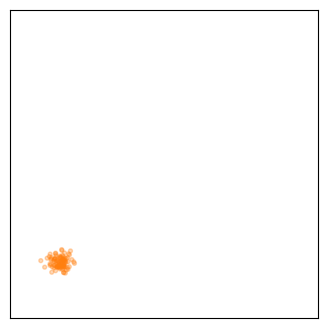

In [7]:
#  Add cells with a scattered initial condition and plot trajectories
n = 100
landscape.init_cells(n, (0., 0.), noise=2.)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

# plot final states
plot_cells(landscape, L)

# Cells starting around module i
i = 1
landscape.init_cells(n, i, noise=0.2)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

plot_cells(landscape, L)


Landscape with modules:
Center at (1.88243, 0.09788), a = [0.73172 0.68146 2.01702], s = [1.33456 1.28976 0.89352],
UnstableNode at (1.02432, 2.93093), a = [2.48317 2.72925 0.98698], s = [0.75814 0.56236 0.58497],
UnstableNode at (2.77868, -2.05657), a = [2.4029  1.57204 1.7999 ], s = [0.9145  1.21306 1.28905],
Center at (2.42173, 0.59351), a = [2.81008 0.83802 2.30479], s = [0.68122 0.89992 1.309  ],
NegCenter at (-1.10148, -0.4903), a = [2.61128 1.57785 1.19984], s = [0.87907 1.28364 0.60923],
Node at (1.43117, -2.47159), a = [1.81868 2.44533 1.13227], s = [0.75633 0.88936 0.69125],
NegCenter at (-0.27488, 2.52513), a = [1.26424 2.26645 1.96681], s = [0.79457 0.90611 1.45083]


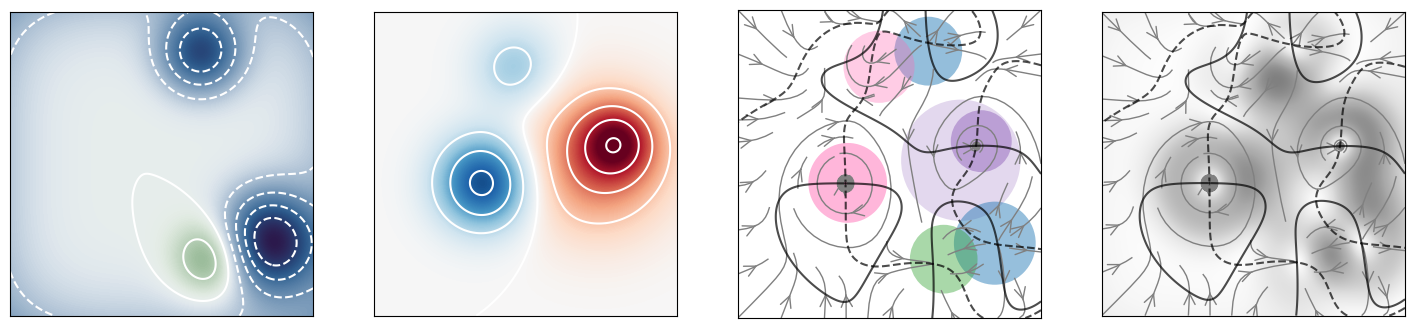

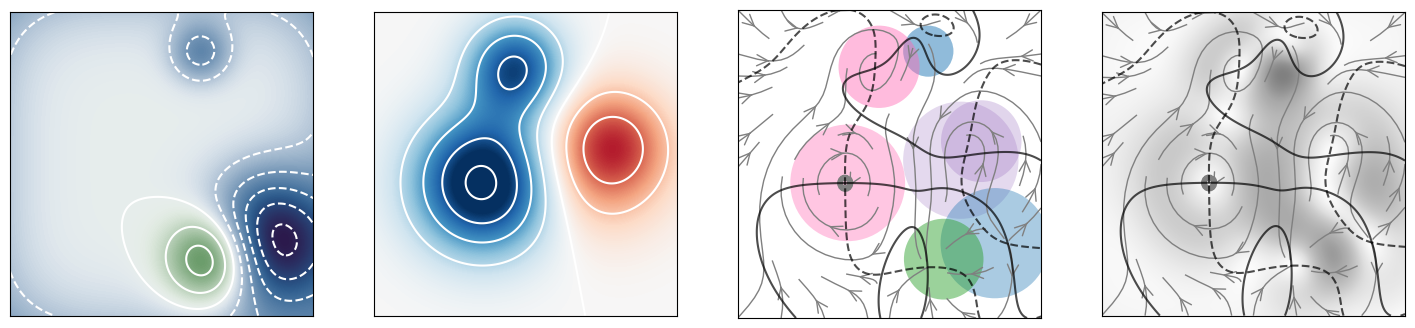

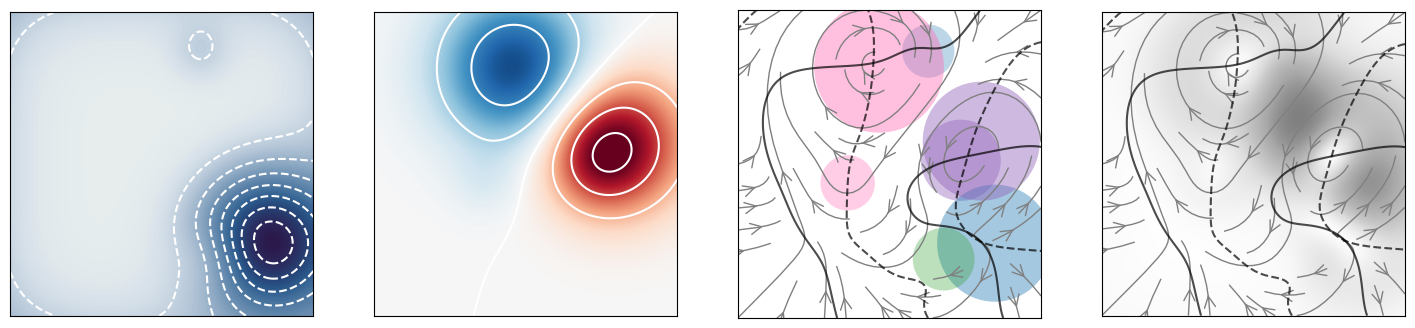

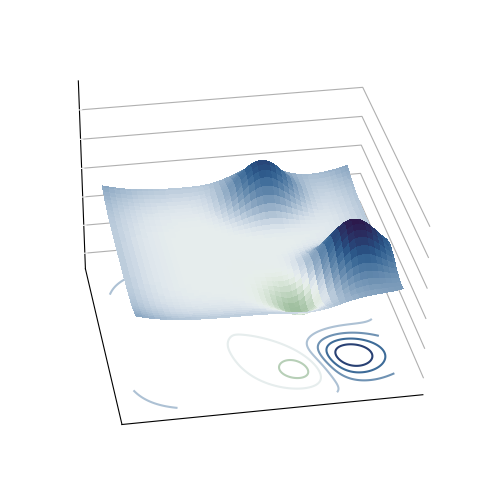

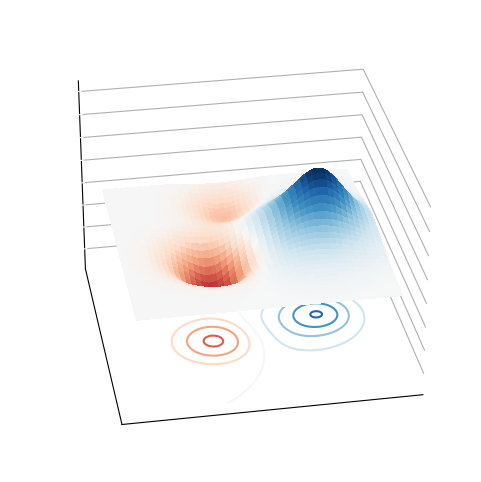

In [8]:
# Random generation of a landscape with gradient and curl modules (piecewise 3 regimes)
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node, UnstableNode, Center, NegCenter)
n_modules = 7
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

dX, dY = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot=True)
# fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=True)